# Nivell 1

### Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules. Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

### Exercici 1

Una variable numèrica.

Importamos todo lo necesario

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

Creamos la conexion

In [2]:
db = mysql.connector.connect(host="localhost",
                            user = "root",
                            passwd = "A.bast2015",
                            database = "transactions_updated")

Ahora necesitaremos generar un dataframe con el que podremos trabajar más comodamente

In [3]:
df = pd.read_sql("SELECT * FROM transaction JOIN company ON company.company_id = transaction.business_id", con=db)

C:\Users\Gman\AppData\Local\Temp\ipykernel_16360\2519459989.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM transaction JOIN company ON company.company_id = transaction.business_id", con=db)


Ahora revisamos que el campo amount este correctamente para que la gráfica tenga sentido.

In [4]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            587 non-null    object        
 1   card_id       587 non-null    object        
 2   business_id   587 non-null    object        
 3   timestamp     587 non-null    datetime64[ns]
 4   amount        587 non-null    float64       
 5   declined      587 non-null    int64         
 6   product_ids   587 non-null    object        
 7   user_id       587 non-null    int64         
 8   lat           587 non-null    float64       
 9   longitude     587 non-null    float64       
 10  product_id1   587 non-null    object        
 11  product_id2   0 non-null      object        
 12  product_id3   0 non-null      object        
 13  product_id4   0 non-null      object        
 14  company_id    587 non-null    object        
 15  company_name  587 non-null    object    

Aqui tiramos los comandos de matplotlib para poder generar gráficas.
Usaremos "hist" para generar el cuadro donde ira el histograma cogiendo el valor del amount, le he puesto algo de diseño para que se viera mejor.
Usamos el title para introcudir un título a este histograma
Luego añadimos los titulos de los axis, con ylabel y xlabel.
y por ultimo hacemos un plt.show() parar mostrar el conjunto (he visto que sin el plt.show tambien lo muestra pero lo pongo por costumbre.)

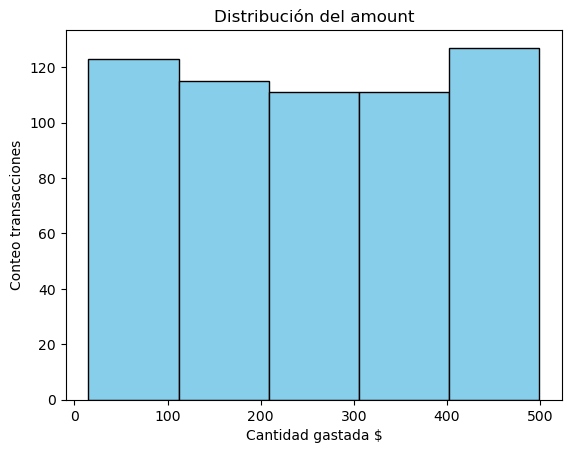

In [5]:
plt.hist(df['amount'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribución del amount')
plt.xlabel('Cantidad gastada $')
plt.ylabel('Conteo transacciones')
plt.show()

En esta Histograma, podemos ver la distribución del amount, por ejemplo vemos que el rango de productos mas vendidos son los mas caros, los que valen entre 400 y 500, tenemos alrededor de unas 130 transacciones. Pero en lineas generales podemos concluir que no hay gran diferencia de ventas por el precio de producto.


# ----------------------------------------------------------------------------------------------------------

### Exercici 2

Dues variables numèriques.

Para este ejercicio voy a utilizar las variables de precio y edad para comparar la cantidad de productos que se compran segun la edad. En este caso generamos el dataframse con un SELECT donde cogemos el precio y usamos el timestampdiff para poder obtener la edad de cada usuario.

In [6]:
df = pd.read_sql("SELECT product.price, TIMESTAMPDIFF(YEAR, STR_TO_DATE(birth_date, '%b %d, %Y'), CURDATE()) AS age FROM data_user JOIN transaction ON transaction.user_id = data_user.id JOIN product ON product.id = transaction.product_ids;", con=db)

C:\Users\Gman\AppData\Local\Temp\ipykernel_16360\3045590498.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT product.price, TIMESTAMPDIFF(YEAR, STR_TO_DATE(birth_date, '%b %d, %Y'), CURDATE()) AS age FROM data_user JOIN transaction ON transaction.user_id = data_user.id JOIN product ON product.id = transaction.product_ids;", con=db)


Comprobamos que los formatos de los campos sean los correctos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   price   110 non-null    object
 1   age     110 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


Vemos que el campo price esta en formato object y necesitamos pasarlo a float

In [8]:
df["price"] = df["price"].astype(float)

Para este caso he decidido usar un scatter.
He cogido los campos price y age

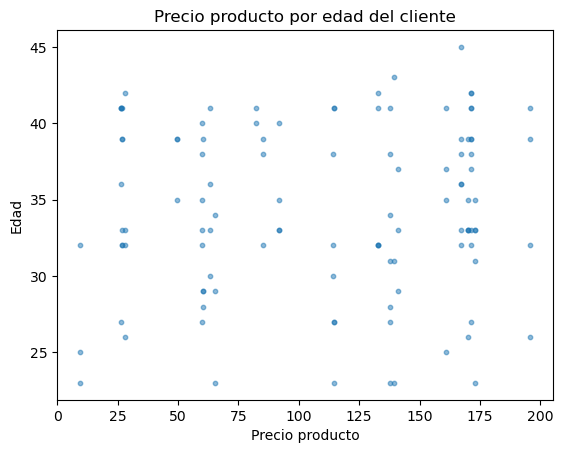

In [9]:
plt.scatter(df['price'], df["age"], alpha=0.5, s=10)
plt.title('Precio producto por edad del cliente')
plt.xlabel('Precio producto')
plt.ylabel('Edad')
plt.show()

En este Scatter Plot, podemos ver que las edades que compran menos, son las más distantes, tenemos los más jovenes y las personas más mayores. Podemos ver que donde se concentran más compras son entre la gente de 30 a 40 años y que de todo el rango de precios, el que más se han comprado ronda los 170-175$.

# ------------------------------------------------------------------------------------------------------------

## Exercici 3

Una variable categòrica.

Generamos un dataframe con los datos de usuario, en este caso querre un conteo de usuarios por país

In [10]:
df = pd.read_sql("SELECT * FROM data_user", con=db)

C:\Users\Gman\AppData\Local\Temp\ipykernel_16360\3568010599.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM data_user", con=db)


Revisamos los datos

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           275 non-null    int64 
 1   name         275 non-null    object
 2   surname      275 non-null    object
 3   phone        275 non-null    object
 4   email        275 non-null    object
 5   birth_date   275 non-null    object
 6   country      275 non-null    object
 7   city         275 non-null    object
 8   postal_code  275 non-null    object
 9   address      275 non-null    object
dtypes: int64(1), object(9)
memory usage: 21.6+ KB


In [12]:
df.country.unique()
df['country'].value_counts()
#conteo_por_pais.values
#conteo_por_pais.index


United States     150
Canada             75
United Kingdom     50
Name: country, dtype: int64

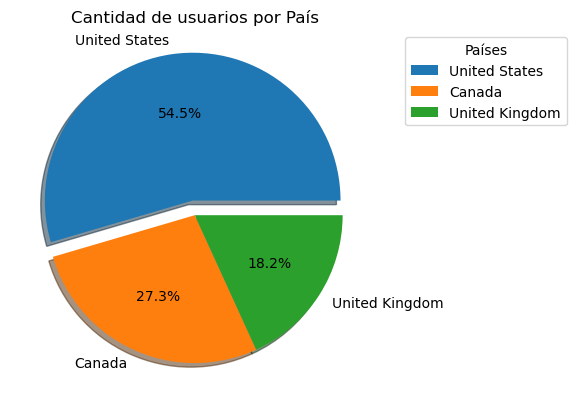

In [13]:
conteo_por_pais = df['country'].value_counts()

# Obtener los datos y las etiquetas
datos = conteo_por_pais.values
etiquetas = conteo_por_pais.index
myexplode = [0.1, 0, 0]

# Crear el gráfico circular (pie chart)
plt.pie(datos, labels=etiquetas, autopct='%1.1f%%', shadow = "true", explode = myexplode)

# Añadir título
plt.title('Cantidad de usuarios por País')

#Legend
plt.legend(title = "Países", bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

En este pie chart, podemos ver la cantidad de usuarios que tenemos por país, podemos extraer que con diferencia USA tiene más usuarios que UK y Canada juntos.

# ---------------------------------------------------------------------------------------------------------

## Exercici 4

Una variable categòrica i una numèrica.

##UPDATE Corregido los ejes para que se presenten por orden de cantidad y no por orden alfabético del país

In [14]:
df = pd.read_sql("SELECT SUM(transaction.amount) AS cantidad , company.country AS pais FROM transaction JOIN company ON company.company_id = transaction.business_id GROUP BY company.country", con=db)

C:\Users\Gman\AppData\Local\Temp\ipykernel_16360\2236700587.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT SUM(transaction.amount) AS cantidad , company.country AS pais FROM transaction JOIN company ON company.company_id = transaction.business_id GROUP BY company.country", con=db)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cantidad  15 non-null     float64
 1   pais      15 non-null     object 
dtypes: float64(1), object(1)
memory usage: 372.0+ bytes


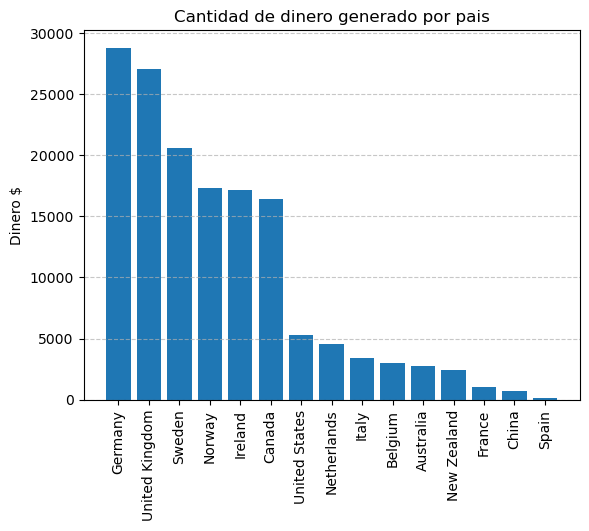

In [16]:
# Sort the DataFrame by the 'cantidad' column in descending order
df_sorted = df.sort_values(by='cantidad', ascending=False)

# Create the bar plot
plt.bar(df_sorted['pais'], df_sorted['cantidad'])
plt.title('Cantidad de dinero generado por pais')
plt.ylabel('Dinero $')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


En este gráfico de barras, podemos extraer de información la cantidad de dinero que han generado cada país en ventas.
Con diferencia, vemos que el grupo de países que más dinero han generado en ventas son Alemania y Reino Unido(ambos Europeos). Luego en segunda posición tendriamos a Suecia(Europeo), en tercera posicion tenemos a canada(america), Noruega y Irlanda(ambos Europeos). Y entrariamos en el  cuarto grupo donde solo esta USA(y aqui haria una reflexión, justo en el ejercicio anterior, hemos podido comprobar que con gran diferencia, la mayoria de usuarios son de estados unidos, entonces aqui vendría mi pregunta, deberiamos mirar en que paises compran los usuarios de USA y que productos compran, por que si la mayoria estan comprando X producto en UK, y ese producto no lo tenemos en USA, quizas seria mas optimo añadir ese producto en el mercado de USA y poder las empresas ahorrarse envios, cambios de divisas, etc etc) y por último, tenemos el grupo de países que menos han vendido, Italia, Nueva Zelanda, España, Francia, Países Bajos, Australia, Bélgica y China.

# ---------------------------------------------------------------------------------------------------------

## Exercici 5

Dues variables categòriques.

In [17]:
df = pd.read_sql("SELECT company.country,transaction.declined FROM transaction JOIN company ON company.company_id = transaction.business_id", con=db)

C:\Users\Gman\AppData\Local\Temp\ipykernel_16360\3411039008.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT company.country,transaction.declined FROM transaction JOIN company ON company.company_id = transaction.business_id", con=db)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   587 non-null    object
 1   declined  587 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.3+ KB


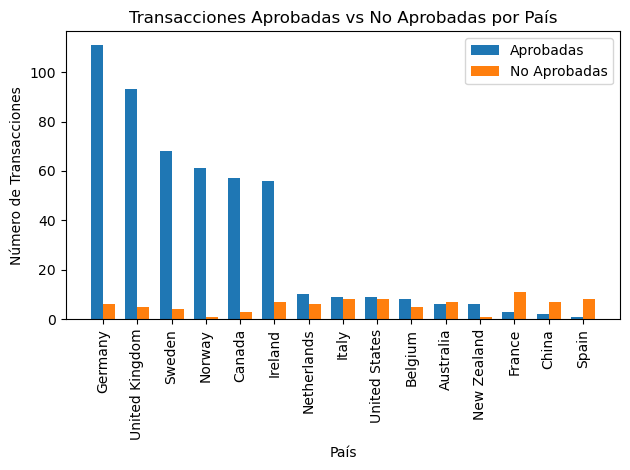

In [19]:
# Obtener los datos de transacciones aprobadas y no aprobadas por país
approved = df[df['declined'] == 0].groupby('country')['declined'].count()
declined = df[df['declined'] == 1].groupby('country')['declined'].count()

# Ordenar los datos por el número total de transacciones aprobadas
approved = approved.sort_values(ascending=False)

# Obtener los países en el mismo orden que los datos ordenados
countries = approved.index

# Con el bar_width configuramos la anchura de las barras
bar_width = 0.35
# Aquí generamos un índice, que será necesario para establecer la cantidad de países que introduciremos en el X-axis
index = np.arange(len(countries))

# Aquí generaremos la barra azul del gráfico, la cual veremos la cantidad de aprobados.
# Para generar esta barra necesitamos saber el índice (index), el count de aprobadas agrupadas por país (approved),
# el tamaño de grosor de la barra que ya lo hemos establecido anteriormente con bar_width, y le ponemos una etiqueta con label.
plt.bar(index, approved, bar_width, label='Aprobadas')

# Aquí generamos prácticamente lo mismo, la diferencia es que añadimos el index sumándole el bar_width (esto es lo que nos hace es
# generar la siguiente barra a la derecha, en vez de usar approved, aquí sumaremos los declined, y añadirle el label)
plt.bar(index + bar_width, declined, bar_width, label='No Aprobadas')

# Personalizar el gráfico
plt.title('Transacciones Aprobadas vs No Aprobadas por País')
plt.xlabel('País')
plt.ylabel('Número de Transacciones')

# Aquí el index + bardwith /2, como lo estamos ejecutando en los ticks del X-axis, lo que hace es ajustar donde queremos que
# aparezca el tick, en este caso al dividirlo /2, lo que hace es dejar el nombre del país, justo en el medio para que quede
# centrado
plt.xticks(index + bar_width / 2, countries, rotation=90)
plt.legend()
# El tight_layout veo que hace verse la gráfica más estirada, dando mejor visualización en este caso
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Aqui vemos que de los 15 paises que participan, 9 de ellos estan practicamente a la par entre aprobadas y no aprobadas.
Los paises que estan teniendo un comportamiento esperable que sea que la mayoria de transacciones no se denieguen son los siguientes:

Europeos: Germany, UK, Sweden, Norway, Ireland |
Americanos: Canada

Vemos que hay 3 países que tienen mas transacciones no aprobadas que aprobadas:
Europeos: Francia, España
Asiaticos: China


Vemos que el país que va mejor es Alemania y que el país que va peor es España, ambos europeos.

# -------------------------------------------------------------------------------------------------------

## - Exercici 6

Tres variables.

In [20]:
df = pd.read_sql("SELECT * FROM company JOIN transaction ON transaction.business_id = company.company_id", con=db)

C:\Users\Gman\AppData\Local\Temp\ipykernel_16360\1131902739.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM company JOIN transaction ON transaction.business_id = company.company_id", con=db)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   company_id    587 non-null    object        
 1   company_name  587 non-null    object        
 2   phone         587 non-null    object        
 3   email         587 non-null    object        
 4   country       587 non-null    object        
 5   website       587 non-null    object        
 6   id            587 non-null    object        
 7   card_id       587 non-null    object        
 8   business_id   587 non-null    object        
 9   timestamp     587 non-null    datetime64[ns]
 10  amount        587 non-null    float64       
 11  declined      587 non-null    int64         
 12  product_ids   587 non-null    object        
 13  user_id       587 non-null    int64         
 14  lat           587 non-null    float64       
 15  longitude     587 non-null    float64   

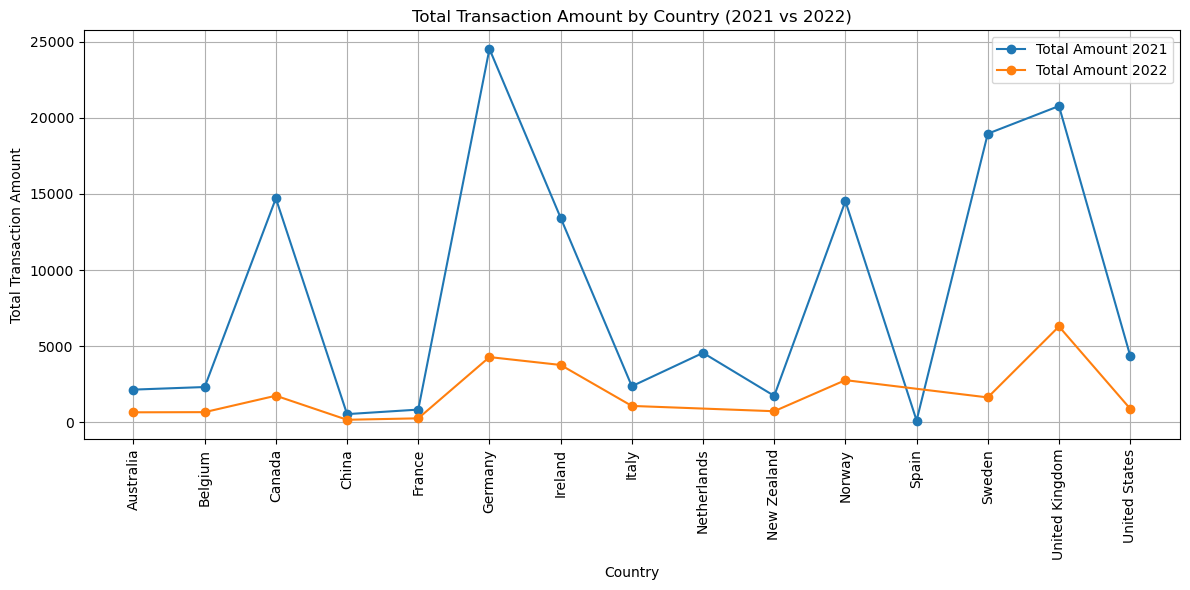

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your DataFrame df with the provided information
# Extract the year from the timestamp column
df['year'] = df['timestamp'].dt.year

# Filter the DataFrame for the years 2021 and 2022
df_2021 = df[df['year'] == 2021]
df_2022 = df[df['year'] == 2022]

# Calculate the total amount for each country in 2021
amount_total_2021 = df_2021.groupby("country")["amount"].sum()

# Calculate the total amount for each country in 2022
amount_total_2022 = df_2022.groupby("country")["amount"].sum()

# Plot the line plot
plt.figure(figsize=(12, 6))

# Plot the line for 2021
plt.plot(amount_total_2021.index, amount_total_2021.values, marker='o', label='Total Amount 2021')

# Plot the line for 2022
plt.plot(amount_total_2022.index, amount_total_2022.values, marker='o', label='Total Amount 2022')

# Customize the plot
plt.title('Total Transaction Amount by Country (2021 vs 2022)')
plt.xlabel('Country')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

En esta gráfica podemos diferenciar rápidamente, la cantidad de dinero ganado por país por año. Confirmamos con la gráfica anterior que Alemania y Reino Unido son los que más transaciones han realizado en 2021 y 2022.
Podemos ver que la tendencia de 2022 en los únicos 3 meses es bastante parecida a la de 2021, en el sentido que si fue a ese pais le fue bien, podriamos decir que hasta la fecha en ese pais le esta yendo bien.
Los paises que van por la cola serian España, Francia y China

# ----------------------------------------------------------------------------------------------------

## - Exercici 7

Graficar un Pairplot.

In [23]:
df = pd.read_sql("SELECT transaction.declined, company.country, product.price, product.colour, product.weight FROM transaction JOIN company ON company.company_id = transaction.business_id JOIN credit_card ON credit_card.id = transaction.card_id JOIN data_user ON data_user.id = transaction.user_id JOIN transactions_with_products ON transactions_with_products.id = transaction.id JOIN product ON product.id = transactions_with_products.product_id;", con=db)

C:\Users\Gman\AppData\Local\Temp\ipykernel_16360\376310493.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT transaction.declined, company.country, product.price, product.colour, product.weight FROM transaction JOIN company ON company.company_id = transaction.business_id JOIN credit_card ON credit_card.id = transaction.card_id JOIN data_user ON data_user.id = transaction.user_id JOIN transactions_with_products ON transactions_with_products.id = transaction.id JOIN product ON product.id = transactions_with_products.product_id;", con=db)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   declined  1457 non-null   int64  
 1   country   1457 non-null   object 
 2   price     1457 non-null   object 
 3   colour    1457 non-null   object 
 4   weight    1457 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 57.0+ KB


In [25]:
df["country"] = df["country"].astype("category")
df["price"] = df["price"].astype("float64")
df["colour"] = df["colour"].astype("category")
df["weight"] = df["weight"].astype("float64")


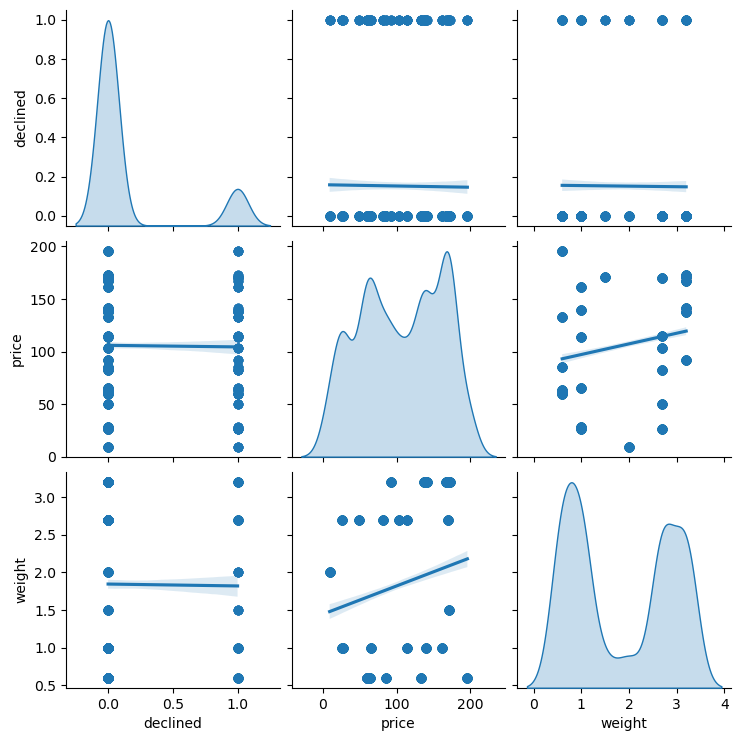

In [26]:
cols_to_plot = ["declined","price","weight"]
sns.pairplot(df[cols_to_plot], diag_kind = "kde", kind="reg")
plt.show()

En este pairplot podemos ver las siguientes relaciones. Vemos que el declined con el peso no tiene ninguna relacion. Vemos que no hay muchos pesos intermedios, la mayoria de productos tienen un peso elevado o liviano y que en ambos pesos se compran muchisimo más en comparación con los pesos medios

# -----------------------------------------------------------------------------------------------------


## Nivell 2
Exercici 1

Correlació de totes les variables numèriques.

In [27]:
df = pd.read_sql("SELECT * FROM transaction JOIN product ON product.id = transaction.product_ids JOIN company ON company.company_id = transaction.business_id;", con=db)

C:\Users\Gman\AppData\Local\Temp\ipykernel_16360\3394089527.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM transaction JOIN product ON product.id = transaction.product_ids JOIN company ON company.company_id = transaction.business_id;", con=db)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            110 non-null    object        
 1   card_id       110 non-null    object        
 2   business_id   110 non-null    object        
 3   timestamp     110 non-null    datetime64[ns]
 4   amount        110 non-null    float64       
 5   declined      110 non-null    int64         
 6   product_ids   110 non-null    object        
 7   user_id       110 non-null    int64         
 8   lat           110 non-null    float64       
 9   longitude     110 non-null    float64       
 10  product_id1   110 non-null    object        
 11  product_id2   0 non-null      object        
 12  product_id3   0 non-null      object        
 13  product_id4   0 non-null      object        
 14  id            110 non-null    object        
 15  product_name  110 non-null    object    

C:\Users\Gman\AppData\Local\Temp\ipykernel_16360\1757680389.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


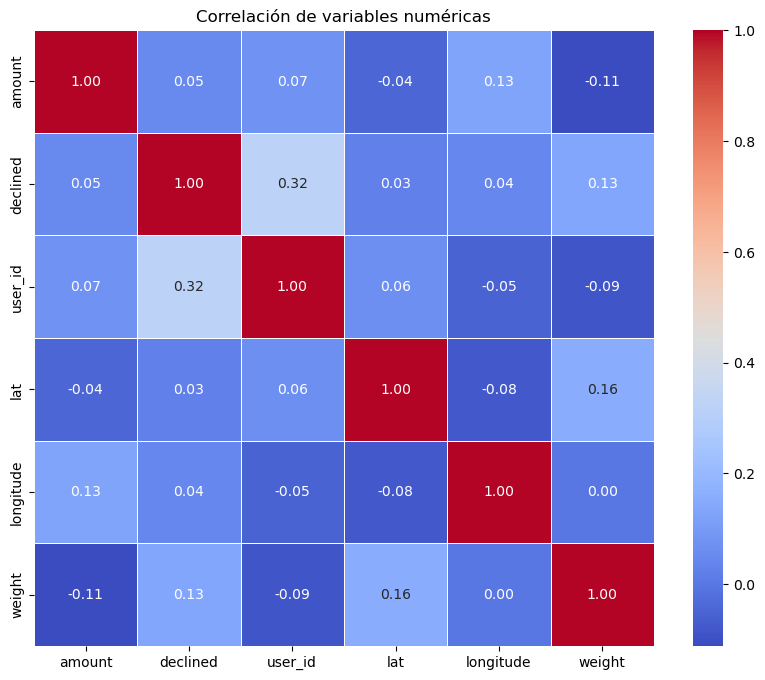

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

correlation = df.corr()

# Genera un mapa de calor con la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlación de variables numéricas')
plt.show()


DEBO REVISAR ESTA PARTE

## SEGUNDO INTENTO

In [30]:
df = pd.read_sql("SELECT * FROM transaction JOIN product ON product.id = transaction.product_ids JOIN company ON company.company_id = transaction.business_id;", con=db)

C:\Users\Gman\AppData\Local\Temp\ipykernel_16360\3394089527.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM transaction JOIN product ON product.id = transaction.product_ids JOIN company ON company.company_id = transaction.business_id;", con=db)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            110 non-null    object        
 1   card_id       110 non-null    object        
 2   business_id   110 non-null    object        
 3   timestamp     110 non-null    datetime64[ns]
 4   amount        110 non-null    float64       
 5   declined      110 non-null    int64         
 6   product_ids   110 non-null    object        
 7   user_id       110 non-null    int64         
 8   lat           110 non-null    float64       
 9   longitude     110 non-null    float64       
 10  product_id1   110 non-null    object        
 11  product_id2   0 non-null      object        
 12  product_id3   0 non-null      object        
 13  product_id4   0 non-null      object        
 14  id            110 non-null    object        
 15  product_name  110 non-null    object    

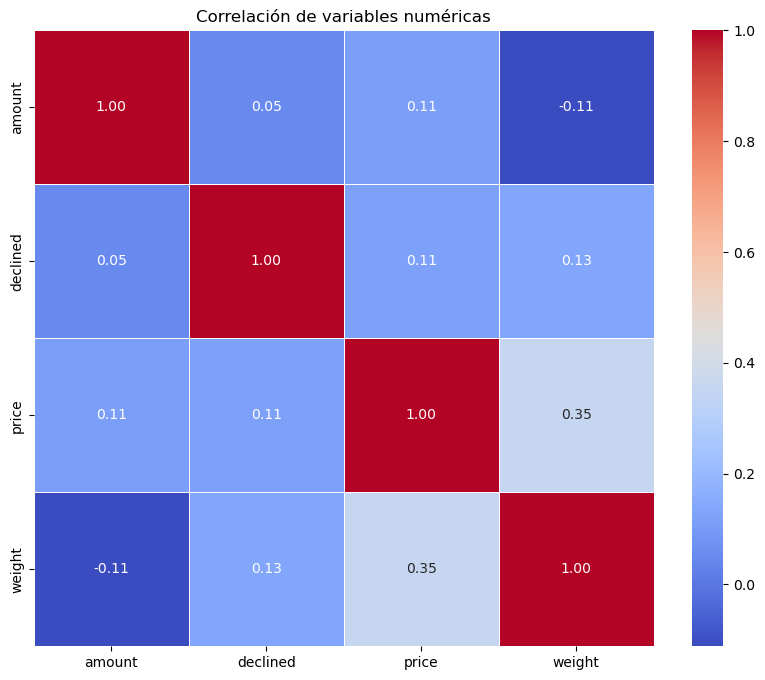

In [32]:
df["price"] = df["price"].astype("float64")
cols_to_plot = ["amount","declined","price","weight"]
correlation = df[cols_to_plot].corr()

# Genera un mapa de calor con la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlación de variables numéricas')
plt.show()

En este heatmap, estamos mirando la correlación entre las variables de peso, amount, declinados y precio.
Como podemos comprobar las variables que tenemos no tienen una gran correlación, si el peso del producto aumenta o disminuye no influye en su precio, ni afecta si han sido declinadas o no.


# -----------------------------------------------------------------------------------------------------

## Exercici 2

Implementa un jointplot.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            110 non-null    object        
 1   card_id       110 non-null    object        
 2   business_id   110 non-null    object        
 3   timestamp     110 non-null    datetime64[ns]
 4   amount        110 non-null    float64       
 5   declined      110 non-null    int64         
 6   product_ids   110 non-null    object        
 7   user_id       110 non-null    int64         
 8   lat           110 non-null    float64       
 9   longitude     110 non-null    float64       
 10  product_id1   110 non-null    object        
 11  product_id2   0 non-null      object        
 12  product_id3   0 non-null      object        
 13  product_id4   0 non-null      object        
 14  id            110 non-null    object        
 15  product_name  110 non-null    object    

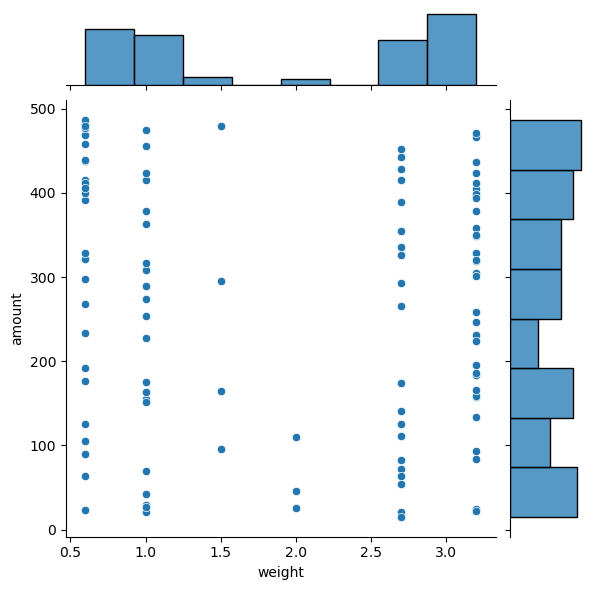

In [34]:
sns.jointplot(data = df,
              x = "weight",
              y = "amount")
plt.show()

En esta gráfica quería ver si había una correlación entre precio y peso. No podemos decir con claridad que el peso sea un indicador claro en el precio, podemos ver que precisamente los precios mas caros, nos los podemos encontrar tanto en los productos con más peso como en los producto mas livianos. (Ejemplo mental: Un producto puede ser muy caro por su peso, pero hay productos livianos como las joyas que valen mucho). Si que vemos que los productos de peso intermedio han generado muchisimas menos ventas(Reflexión: Viendo que la cantidad es tan ínfima comparada con el resto de productos, quizas habria que plantearse ver la cantidad de productos que tenemos con ese peso y ver si podemos reducir el stock de estos productos?)

# -------------------------------------------------------------------------------------------------------------

# NIVELL 3

## Exercici 1

Implementa un violinplot combinat amb un altre tipus de gràfic.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            110 non-null    object        
 1   card_id       110 non-null    object        
 2   business_id   110 non-null    object        
 3   timestamp     110 non-null    datetime64[ns]
 4   amount        110 non-null    float64       
 5   declined      110 non-null    int64         
 6   product_ids   110 non-null    object        
 7   user_id       110 non-null    int64         
 8   lat           110 non-null    float64       
 9   longitude     110 non-null    float64       
 10  product_id1   110 non-null    object        
 11  product_id2   0 non-null      object        
 12  product_id3   0 non-null      object        
 13  product_id4   0 non-null      object        
 14  id            110 non-null    object        
 15  product_name  110 non-null    object    

In [36]:
df["amount"].sort_values()

81      15.05
41      20.33
55      21.24
89      21.93
82      23.35
        ...  
37     477.51
73     479.00
109    480.13
34     481.75
39     486.54
Name: amount, Length: 110, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Germany'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'Norway'),
  Text(3, 0, 'Sweden'),
  Text(4, 0, 'United Kingdom'),
  Text(5, 0, 'New Zealand'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'Ireland'),
  Text(8, 0, 'United States'),
  Text(9, 0, 'Belgium'),
  Text(10, 0, 'Netherlands'),
  Text(11, 0, 'Italy')])

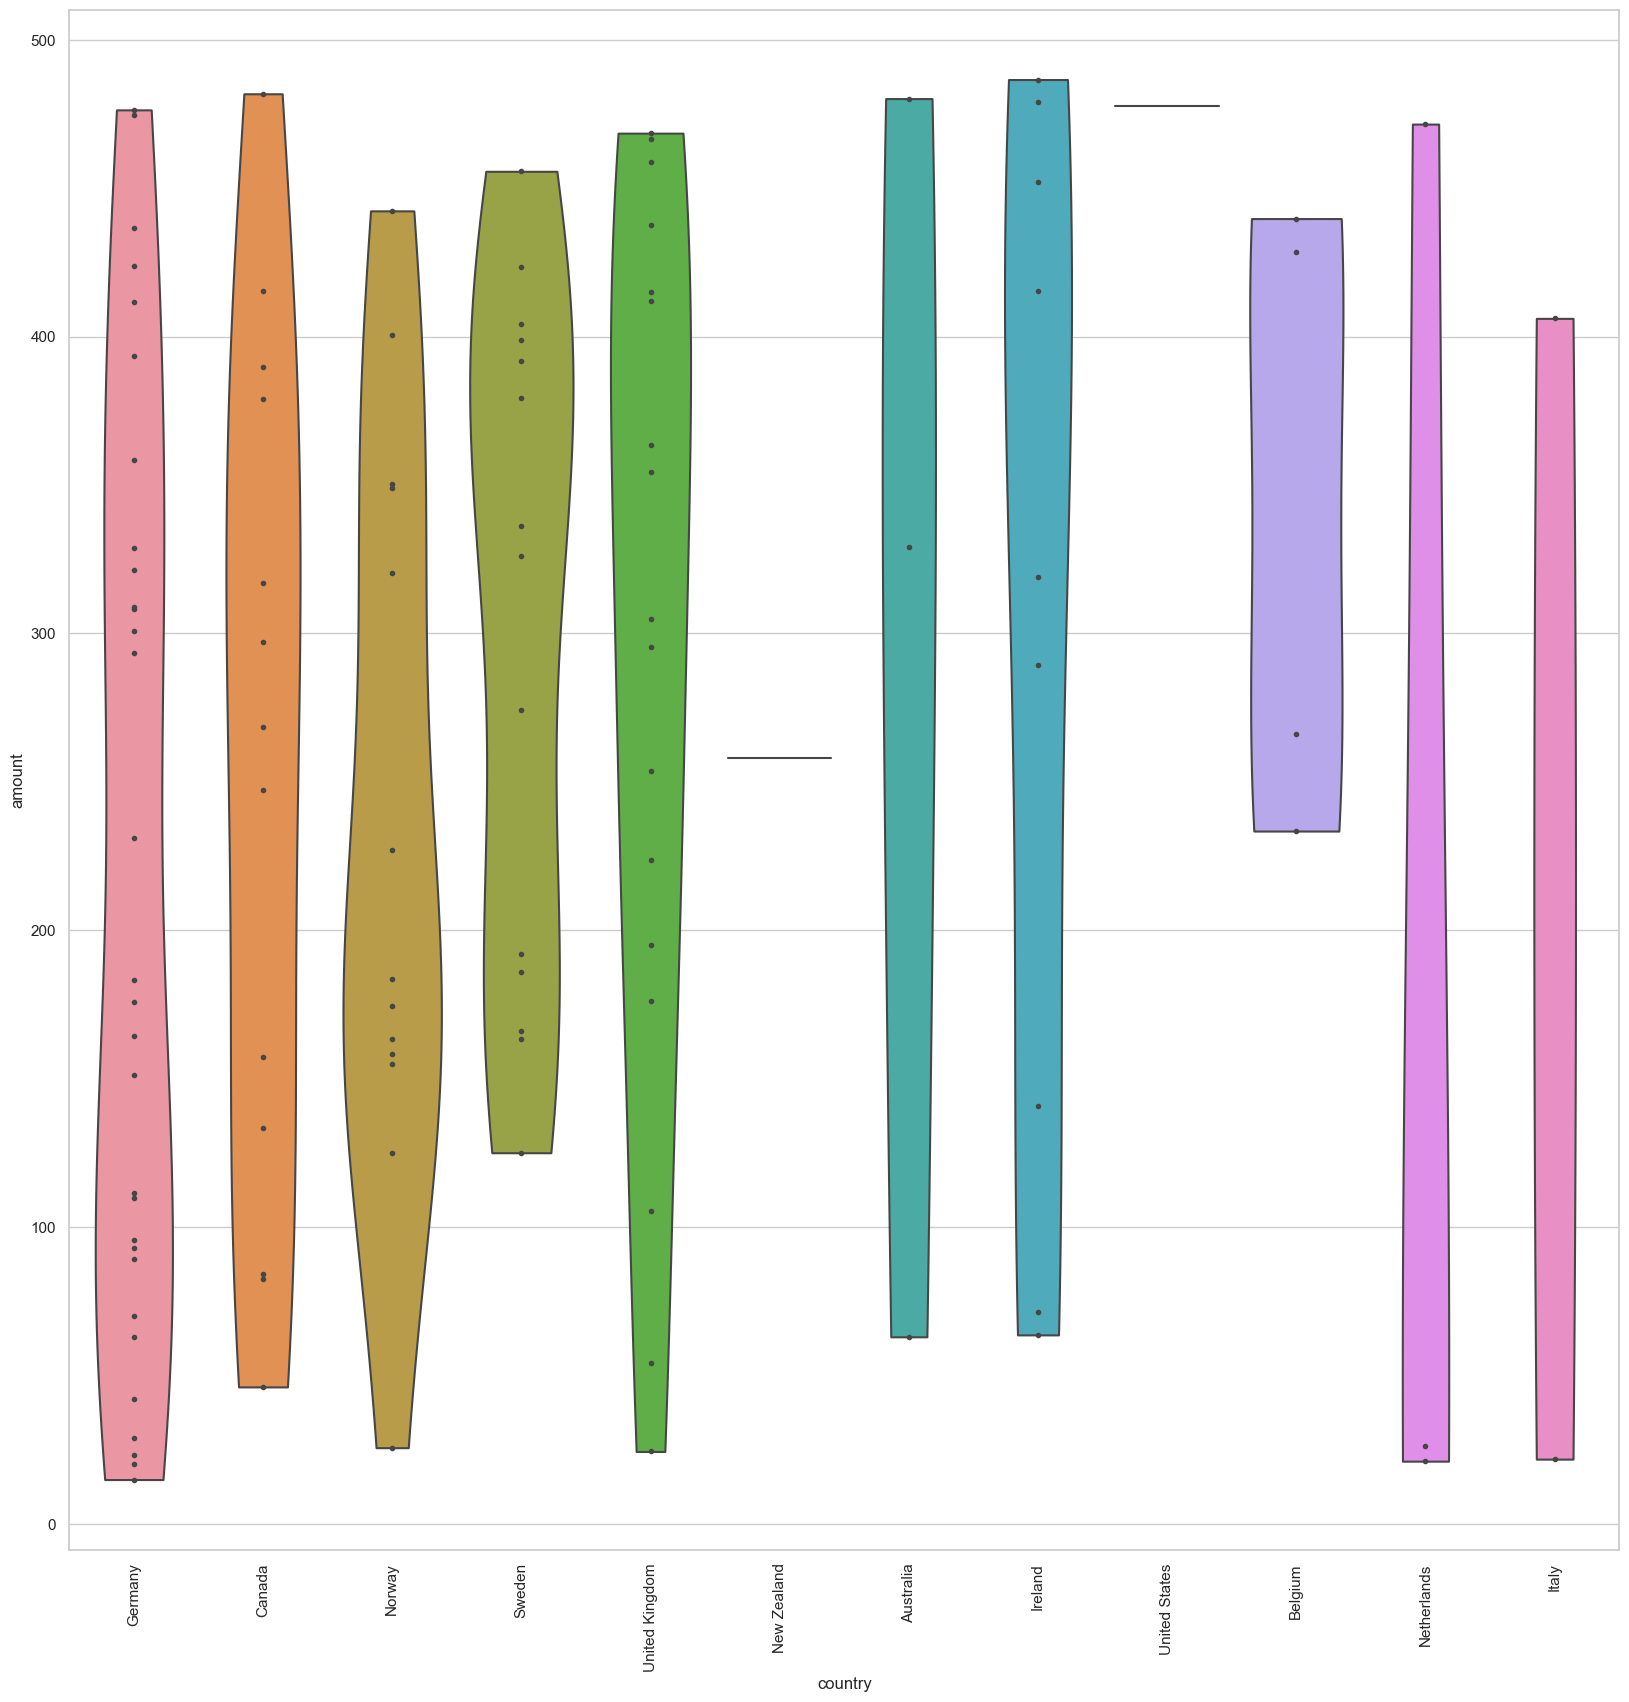

In [37]:
import seaborn as sns
sns.set(style = 'whitegrid') 
 
# loading data-set
plt.figure(figsize=(20,20))
 
sns.violinplot(x ='country', y ='amount',
                   data = df,
                   inner="points",
                  cut = 0)
plt.xticks(rotation=90)

En este gráfico podemos ver la relacion entre el precio de producto minimo comprado por país, y el producto más caro comprado por país. Aparte tenemos el Scatter plot que nos ayuda a ver cuantas transacciones tambien tenemos por país.

# -----------------------------------------------------------------------------------------------

## Exercici 2

Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            110 non-null    object        
 1   card_id       110 non-null    object        
 2   business_id   110 non-null    object        
 3   timestamp     110 non-null    datetime64[ns]
 4   amount        110 non-null    float64       
 5   declined      110 non-null    int64         
 6   product_ids   110 non-null    object        
 7   user_id       110 non-null    int64         
 8   lat           110 non-null    float64       
 9   longitude     110 non-null    float64       
 10  product_id1   110 non-null    object        
 11  product_id2   0 non-null      object        
 12  product_id3   0 non-null      object        
 13  product_id4   0 non-null      object        
 14  id            110 non-null    object        
 15  product_name  110 non-null    object    

In [39]:
# Selecciona las variables de interés
df_selected = df.loc[:, ['price', 'colour', 'weight', 'country', 'declined']]

# Muestra las primeras filas del nuevo DataFrame
print(df_selected.head())
df_selected.info()

    price   colour  weight  country  declined
0  114.77  #bcbcbc     2.7  Germany         0
1  167.20  #111111     3.2   Canada         0
2  167.20  #111111     3.2   Norway         1
3  171.22  #dbdbdb     3.2   Sweden         0
4  172.78  #636363     3.2  Germany         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     110 non-null    float64
 1   colour    110 non-null    object 
 2   weight    110 non-null    float64
 3   country   110 non-null    object 
 4   declined  110 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 4.4+ KB


In [40]:
# Definir una función lambda para asignar etiquetas de peso
def assign_weight_label(weight):
    if weight > 1.9:
        return "heavy weight"
    else:
        return "light weight"

# Aplicar la función lambda a la columna 'weight' para crear la nueva columna 'weight_label'
df_selected['weight_label'] = df['weight'].apply(lambda x: assign_weight_label(x))



In [41]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         110 non-null    float64
 1   colour        110 non-null    object 
 2   weight        110 non-null    float64
 3   country       110 non-null    object 
 4   declined      110 non-null    int64  
 5   weight_label  110 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.3+ KB


In [42]:
df_selected['declined_label'] = df_selected['declined'].map({0: 'No', 1: 'Sí'})
df_selected["price"] = df_selected["price"].astype("float64")
df_selected["colour"] = df_selected["colour"].astype("category")
df_selected["weight_label"] = df_selected["weight_label"].astype("category")
df_selected["declined_label"] = df_selected["declined_label"].astype("category")

CPU times: total: 531 ms
Wall time: 535 ms


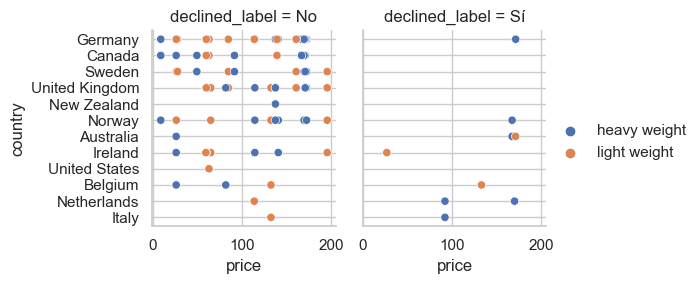

In [43]:
%%time
g = sns.FacetGrid(df_selected, col="declined_label")
g.map_dataframe(sns.scatterplot, x="price", y="country", hue="weight_label")
g.add_legend()


Con el FacetGrid conseguimos en este caso, poder obtener 2 gráficas, que nos dividen la información por transacciones aprobadas y no aprobadas. Dentro de la gráfica tendremos un Scatter plot dividido en 2 grupos, todos aquellos productos que pesen mas de 1.9 KG(Heavy weight- color azul) y los que pesan 1.9k o menos(lightweitght - color naranja). Con esta division por pesos podemos ver cuanto nos ha costado un producto por país y la misma vez saber si es un producto de gran peso o de peso liviano.
Podemos ver por ejemplo en Alemania que la mayoría de productos que compran son de peso liviano y que compran productos de todo tipo de rango de precios. Por poner otro ejemplo vemos que Australia compraria poco, y en este caso barato y pesado.